In [185]:
import numpy as np
import pandas as pd


In [186]:
df=pd.read_csv('D:\Practice\SMS Spam Classifier\spam (1).csv',encoding='latin-1')

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [188]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5036,ham,(You didn't hear it from me),NaN,NaN,NaN
876,ham,Are you in castor? You need to see something,NaN,NaN,NaN
3463,ham,My phone,NaN,NaN,NaN
5552,ham,Have a safe trip to Nigeria. Wish you happines...,NaN,NaN,NaN
930,ham,I'm really sorry i won't b able 2 do this frid...,NaN,NaN,NaN


In [189]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [190]:
df.shape

(5572, 5)

In [191]:
# 1.Data Cleaning
# 2.EDA
# 3.Text Preprocessing
# 4.Model Building
# 5.Model Evaluation
# 6.Improvement
# 7. Website
# 8. Deployment


# 1.Data Cleaning

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [193]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [194]:
df.sample(5)

,v1,v2
3942,ham,I got a call from a landline number. . . I am ...
4067,spam,TBS/PERSOLVO. been chasing us since Sept forå£...
1294,ham,Aiyah u did ok already lar. E nydc at wheellock?
4239,ham,The LAY MAN! Just to let you know you are miss...
3826,spam,Congratulations U can claim 2 VIP row A Ticket...


In [195]:
# rename columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [196]:
df.sample(5)

,target,text
4255,ham,Aah! A cuddle would be lush! I'd need lots of ...
3920,ham,Do 1 thing! Change that sentence into: \Becaus...
884,ham,Yoyyooo u know how to change permissions for a...
5099,ham,"Ah, well that confuses things, doesnt it? I th..."
3813,ham,Can. Dunno wat to get 4 her...


In [197]:
# label encoder
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [198]:
df['target']=encoder.fit_transform(df['target'])

In [199]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [200]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [201]:
# check for duplicate values
df.duplicated().sum()

403

In [202]:
# remove duplicate values
df.drop_duplicates(inplace=True,keep='first')

In [203]:
df.duplicated().sum()

0

In [204]:
df.shape

(5169, 2)

# 2. EDA

In [205]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [206]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

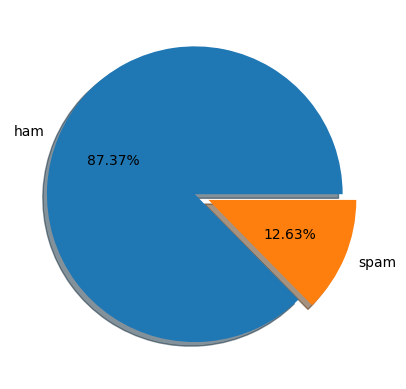

In [207]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%1.2f%%',shadow=True,explode=[0,0.1])
plt.show()

In [208]:
# Data is imbalanced


In [209]:
import nltk

In [210]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Ashish
[nltk_data]     Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [211]:
df['num_characters']=df['text'].apply(len)

In [212]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [213]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [214]:
df['num_words']

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: num_words, Length: 5169, dtype: int64

In [215]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [216]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [217]:
df['num_sentences']

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: num_sentences, Length: 5169, dtype: int64

In [218]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [219]:
# ham
df[['num_characters','num_words','num_sentences']].describe()   

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [220]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [221]:
# spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [222]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

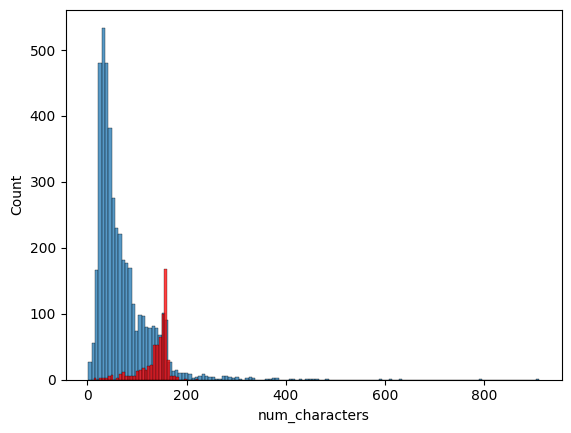

In [223]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

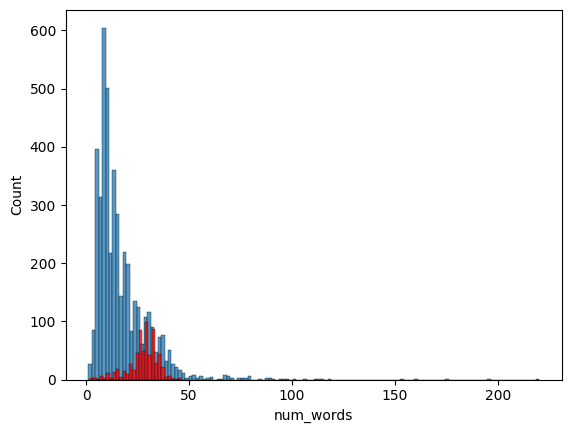

In [224]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

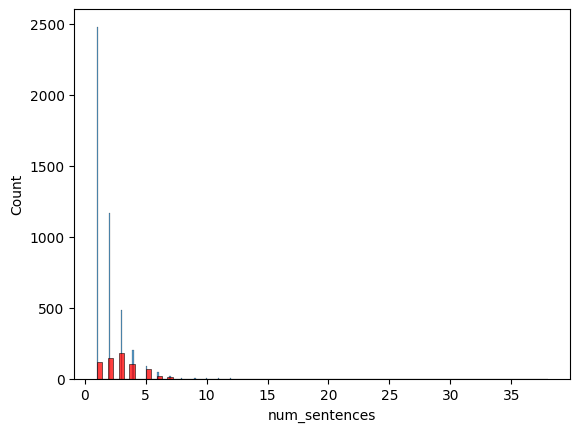

In [225]:
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='red')

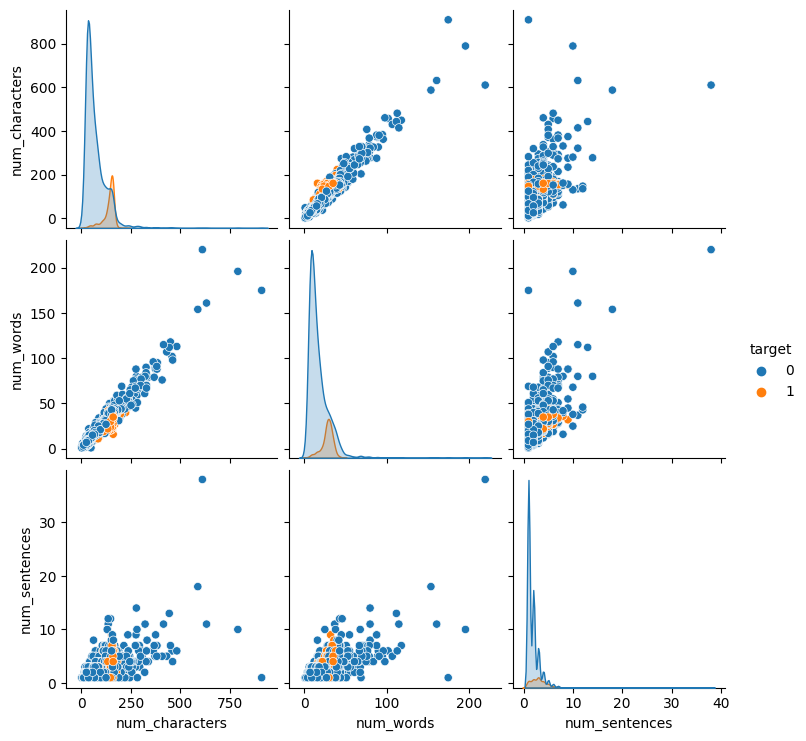

In [226]:
sns.pairplot(df,hue='target')

In [227]:
df.corr(numeric_only=True)

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

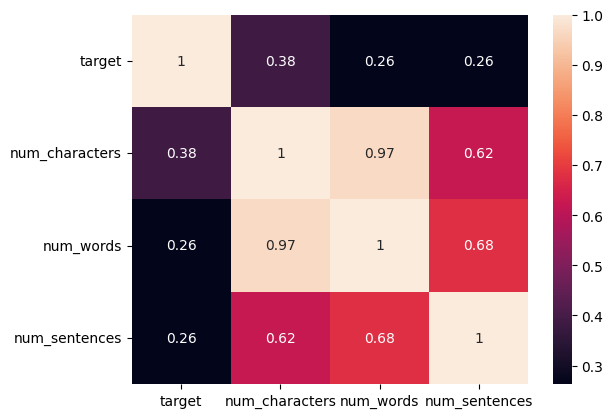

In [228]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [229]:
# 3. Data Preprocessing
  
  #Lower case
  #Remove Punctuation
  #Remove Stopwords
  #Stemming/Lemmatization
  #Tokenization


In [230]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y
    y.clear()

    for i in text:
        if i not in stopwords.words('english')  and i not in string.punctuation: 
            y.append(i)

    return y

In [231]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [232]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Ashish
[nltk_data]     Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [233]:
transform_text('Hello Wo%rld')

[]

In [234]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [235]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english')  and i not in string.punctuation: 
            y.append(i)

    return y

In [236]:
transform_text('did you like my presentation on ml ?')

['like', 'presentation', 'ml']

In [237]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
ps.stem('liked')

'like'

In [238]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english')  and i not in string.punctuation: 
            y.append(i)

    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [239]:
transform_text('i loved the training on ml ..how about you?')

'love train ml'

In [240]:
df['transformed_text']=df['text'].apply(transform_text)

In [241]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [242]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))


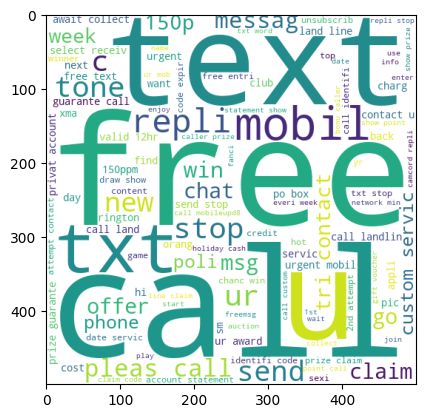

In [243]:
plt.imshow(spam_wc)

In [244]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))


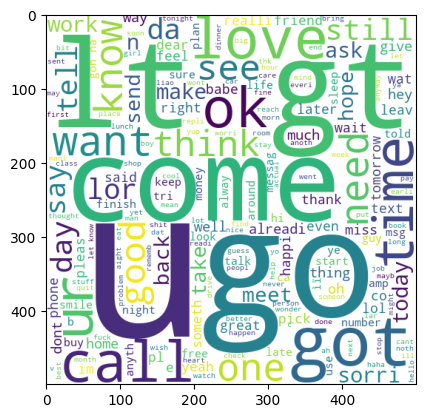

In [245]:
plt.imshow(ham_wc)

In [246]:
# finding the top 30 words of ham and spam words
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)

len(spam_corpus)

9939

In [247]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


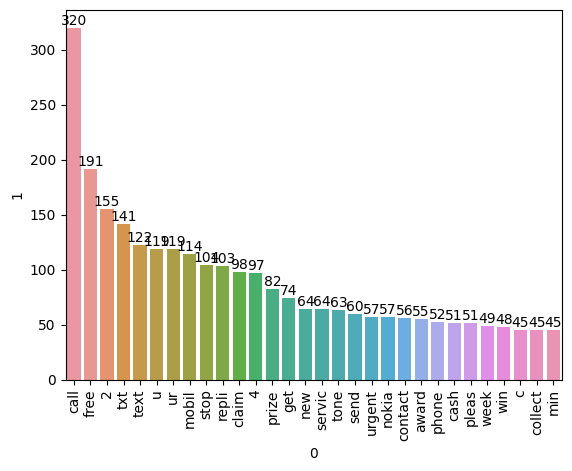

In [248]:
from collections import Counter
ax=sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
ax.bar_label(ax.containers[0])
plt.xticks(rotation="vertical")
plt.show()

In [249]:
ham_corpus=[]
from collections import Counter
pd.DataFrame(Counter(ham_corpus).most_common(30))

""


In [250]:
# finding the top 30 words of ham and spam words
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)

len(ham_corpus)

35404

In [251]:
from collections import Counter
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


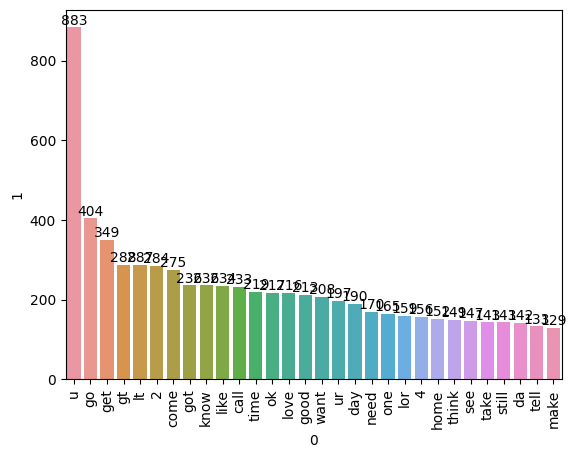

In [252]:
from collections import Counter
ax=sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
ax.bar_label(ax.containers[0])
plt.xticks(rotation="vertical")
plt.show()

# 4. Naive Bayes

In [253]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()

In [254]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [255]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [256]:
X.shape

(5169, 6708)

In [257]:
Y=df['target'].values

In [258]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [259]:
from sklearn.model_selection import train_test_split

In [260]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)


In [261]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [262]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()


In [263]:
gnb.fit(X_train,Y_train)
y_pred1=gnb.predict(X_test)

print(precision_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))
print(accuracy_score(Y_test,y_pred1))

0.5315315315315315
[[792 104]
 [ 20 118]]
0.8800773694390716


In [264]:
mnb.fit(X_train,Y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(Y_test,y_pred2))
print(confusion_matrix(Y_test,y_pred2))
print(precision_score(Y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [265]:
bnb.fit(X_train,Y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(Y_test,y_pred3))
print(confusion_matrix(Y_test,y_pred3))
print(precision_score(Y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [266]:
tfid=TfidfVectorizer(max_features=3000)

In [267]:
X=tfid.fit_transform(df['transformed_text']).toarray()

In [268]:
X.shape

(5169, 3000)

In [269]:
Y=df['target'].values

In [270]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [271]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [272]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [273]:
gnb.fit(X_train,Y_train)
y_pred1=gnb.predict(X_test)

print(precision_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))
print(accuracy_score(Y_test,y_pred1))

0.5068493150684932
[[788 108]
 [ 27 111]]
0.8694390715667312


In [274]:
mnb.fit(X_train,Y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(Y_test,y_pred2))
print(confusion_matrix(Y_test,y_pred2))
print(precision_score(Y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [275]:
bnb.fit(X_train,Y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(Y_test,y_pred3))
print(confusion_matrix(Y_test,y_pred3))
print(precision_score(Y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [276]:
# we will chose tfid->mnb

In [277]:
import pickle
pickle.dump(tfid,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))